## ERA5

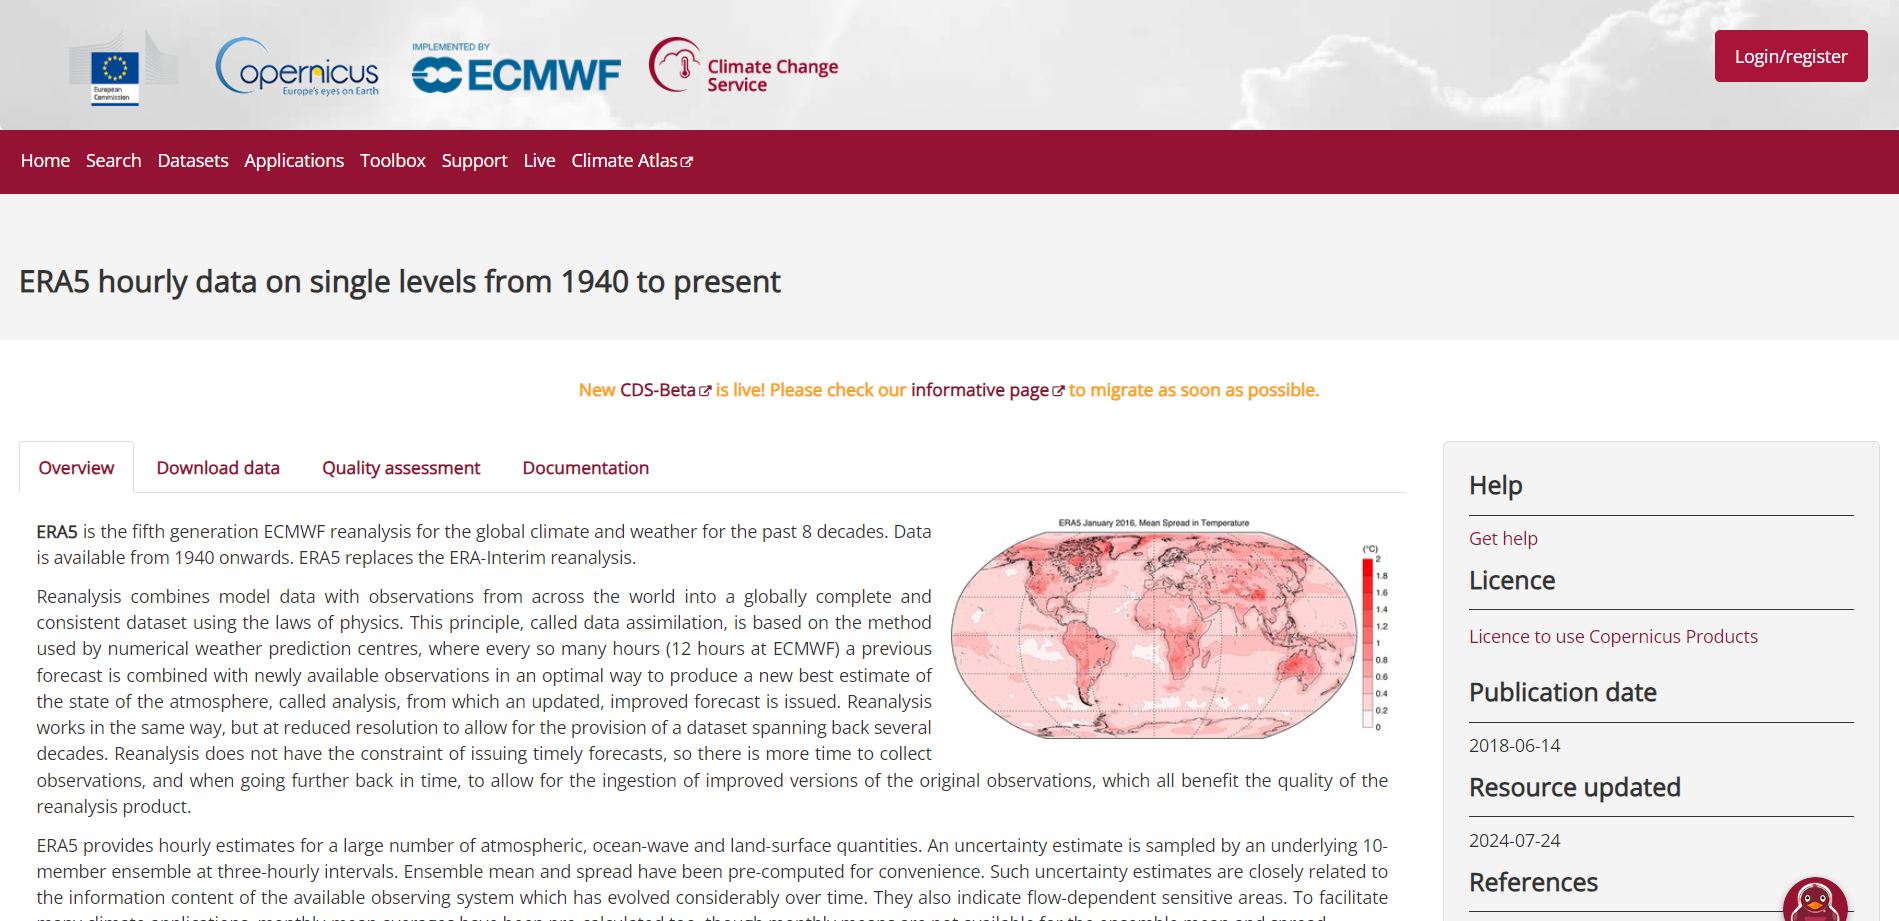

API call to queue download jobs for ERA5

Honestly better off just manually queuing on the website because this API will call, wait to load then download so the script needs to be constantly running. Alternatively you can just go to the website and click click queue multiple at once and they will download all when available so you can off PC and still load the files for download. Absolutely no reason to use API in my honest opinion.

ERA5 Reanalysis: https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels?tab=overview

ERA5 Land: https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-land?tab=overview

In [ ]:
import cdsapi
import os

c = cdsapi.Client()

# Define the range of years and months
years = range(2020, 2024)
months = range(1, 13)

# Ensure the download directory exists
download_dir = "era5_land_data"
os.makedirs(download_dir, exist_ok=True)

# Iterate over each year and month
for year in years:
    for month in months:
        month_str = f"{month:02d}"  # Ensure month is two digits
        year_str = str(year)
        
        # Define the file name for each download
        file_name = f"era5_land_{year_str}_{month_str}.grib"
        file_path = os.path.join(download_dir, file_name)
        
        # Skip download if file already exists
        if os.path.exists(file_path):
            print(f"File {file_path} already exists, skipping download.")
            continue

        print(f"Downloading data for {year_str}-{month_str}...")

        # Retrieve the data
        c.retrieve(
            'reanalysis-era5-land',
            {
                'variable': 'total_precipitation',
                'area': [
                    9.97, 93.16, -7.29,
                    110.42,
                ],
                'time': [
                    '00:00', '01:00', '02:00',
                    '03:00', '04:00', '05:00',
                    '06:00', '07:00', '08:00',
                    '09:00', '10:00', '11:00',
                    '12:00', '13:00', '14:00',
                    '15:00', '16:00', '17:00',
                    '18:00', '19:00', '20:00',
                    '21:00', '22:00', '23:00',
                ],
                'month': month_str,
                'day': [
                    '01', '02', '03',
                    '04', '05', '06',
                    '07', '08', '09',
                    '10', '11', '12',
                    '13', '14', '15',
                    '16', '17', '18',
                    '19', '20', '21',
                    '22', '23', '24',
                    '25', '26', '27',
                    '28', '29', '30',
                    '31',
                ],
                'format': 'grib',
                'year': year_str,
            },
            file_path)
        print(f"Downloaded {file_path}")

print("All downloads completed.")


Plotting of grids

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import cfgrib

# Path to the GRIB file
file_path = "era5_land_data/era5_land_2014_01.grib"

# Open the GRIB file with xarray using the cfgrib engine
data = xr.open_dataset(file_path, engine="cfgrib")

# Print the dataset to understand its structure
print(data)

# Assuming the variable for precipitation is 'tp' (total precipitation)
precipitation = data['tp']

# Select the first time step and first forecast step for example
time_index = 0
step_index = 0



def plotting(time,step):
# Plot the 2D grid of precipitation data
    precipitation_2d = precipitation.isel(time=time, step=step)
    plt.figure(figsize=(10, 6))
    precipitation_2d.plot(cmap='Blues')
    plt.title(f"Total Precipitation at Time Step {time} and Forecast Step {step}")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()
for i in range(1,4):
    for j in range(24):
        plotting(i,j)

Count Rain days

In [4]:
import pandas as pd

# Load the data from the CSV file
file_path = r'C:\Users\userAdmin\Desktop\new\Macro validation\ERA5_LAND\rain_data_changi.csv'  # Replace with the path to your file
df = pd.read_csv(file_path, parse_dates=['Datetime'])

# Group by day and sum the precipitation for each day
df_daily = df.resample('D', on='Datetime').sum()

# Convert precipitation from meters to millimeters
df_daily['Precipitation'] *= 1000

# Add a 'Year' column
df_daily['Year'] = df_daily.index.year

# Count the number of days with rainfall > 0.2 mm for each year
days_with_rain_gt_0_2_per_year = df_daily[df_daily['Precipitation'] > 0.2].groupby('Year').size()

# Display the results
print(days_with_rain_gt_0_2_per_year)

Year
2014    360
2015    362
2016    366
2017    365
2018    362
2019    362
2020    363
2021    361
2022    365
2023    365
dtype: int64
